# Regression on the Franke Function

## 1.1 Introduction



On the most fundamental machine learning methods available to us is linear regression. In the following, we will use ordinairy least squares (OLS), and a "derivative" of this method, to evaluate a function called The Franke Function




## 2.1 Theory

In the first part of this project we aim to explore the fitting of a polynomial function to a data set. A dataset we will generate ourselves. This dataset will be generated by the Franke function, defined on the interval $x,y\in[0,1]$ The Franke function itself is defined as

\begin{equation}
f(x,y)=\frac{3}{4}e^{\frac{{-(9x-2)^2}}{4}-\frac{(9y-2)^2}{4}}+
\frac{3}{4} e^{\frac{(-(9x+1)^2}{49}-\frac{(9y+1)}{10}}+
\frac{1}{2}e^{\frac{(-(9x-7)^2}{4}-\frac{(9y-3)^2}{4}}-
\frac{1}{5}e^{-(9x-4)^2-(9y-7)^2}
\tag{1}
\end{equation}

For det sake of realism we will also add normally distributed noise $N(0,σ^2 )$ where $σ^1=1$ to this function. We will then say $f(x,y)+N(0,1)=z$

The variance of the noise in a dataset is almost always unknown. There are a few ways to deal with this. One can simply assume the variance to be equal to 1, one can model the noise, etc. 
In this particular case, the variance is actually (obviously) known. 


When it comes to modelling data, there is a myriad of different algorithms one can employ. We will explore the perhaps simplest ways of data modelling with three different algorithms. 
The first is algorithm we will use is ordinary least squares, but first let’s take a look at the general case of polynomial fitting


In the case of an unknown function $f(x)$, we can model this function by assuming it has similar shape to a polynomial function $\tilde{y}(x)$:



$$
\tilde{y}(x) = \beta_0+\beta_1 x + \beta_2 x^2 + \cdots + \beta_n x^n
\tag{2}
$$



This assumtion is not as far fetched as one initially may belive. If you're mathematically inclined you may be able to spot the similarities betweet (2) and the Maclaurin expansion of an arbitrary function. If you are not as mathematically inclined, bear with me as I will briefly introduce you to the wonderful world of Taylor (and Maclaurin) series.



The idea behind Taylor series is that a polynomial of "infinite degree" can model any smooth, continuous function $f(x)$. In fact: this polynomial $T(x)$ will be equal to the function you are modelling: 
$$
T(x)=f(x), \forall x
$$
<br>
The expression for a Taylor series might look intimidating, but it is really not that bad:

Assume you want to model a function $f(x)$. The Taylor series $T$ of this function will be


\begin{equation}
f(x) = \lim_{n \to \infty} T_n=\sum_{0}^{n}\frac{f^{(n)}(a)}{n!}(x-a)^n
\tag{3}
\end{equation}

Here, $a$ is an (perhaps not) arbitrary point, around which you model the function. $f^{(n)}(a)$ is the $n$-th derivative of the function $f(x)$ at the point $a$.

A Maclaurin series is a special case of the Taylor series, where $a=0$. It is easy to see why this is benificial, the $(x-a)^n$ term can quickly become cumbersome for $n\geq 2$

If we expand $T_n$ around $a=0$ we get

$T_n=\frac{f(0)}{0!}+\frac{f'(0)}{1!}x+\frac{f^n(0)}{2!}x^2+\cdots +\frac{f^{(n)}(0)}{n!}x^n$

We can then let 
<br>
$$\frac{f(0)}{0!}=\beta_0$$
<br>
$$\frac{f'(0)}{1!} = \beta_1$$
<br>
$$\frac{f^n(0)}{2!}=\beta_2$$
<br>
$$\vdots$$
<br>
$$\frac{f^{(n)}(0)}{n!}=\beta_n$$

We might think that from this, we can perfectly model any data, provided we use a large enough polynomial degree. This is not the case, and why this is, is two-fold. The first reason is that using infinite degree polynomials are somwhat impractical (read: impossible). The second reason we will get back to in section 2.3.

We can actually demonstrate the power of the Taylor series in very few lines of code. Let's assume we want to approximate $sin(x)$. Then we will have to find the $n$-th derivative of $sin(x)$ first. This is pretty easy to find:
$$\frac{d}{dx}sin(x)=cos(x)$$
<br>
$$\frac{d^2}{dx^2}sin(x)=-sin(x)$$
<br>
$$\frac{d^3}{dx^3}sin(x)=-cos(x)$$
<br>
$$\frac{d^4}{dx^4}sin(x)=sin(x)$$
<br>
$$\vdots$$

If we chose $a=0$, we get
$$\frac{d}{dx}sin(0)=cos(0)=1$$
<br>
$$\frac{d^2}{dx^2}sin(0)=-sin(0)= 0$$
<br>
$$\frac{d^3}{dx^3}sin(0)=-cos(0)=-1$$
<br>
$$\frac{d^4}{dx^4}sin(0)=sin(0)=0$$
<br>
$$\vdots$$

This makes us able to write out the first few terms of the Taylor series:
$$T(x)=\sum_{n=0}^{\infty}\frac{sin^{(n)}(a)}{n!}(x)^n=\frac{sin(0)}{0!}x^0+\frac{cos(0)}{1!}x-\frac{sin(0)}{2!}x^2
-\frac{cos(0)}{3!}x^3+\frac{sin(0)}{4!}x^4+\cdots$$

$$=0+x-0-\frac{x^3}{3!}+0\cdots=\sum_{i=0}^{\infty}\frac{(-1)^{i}x^{2i+1}}{(2i+1)!}$$

We can write a funtion to evaluate this sum for a finite value of n:

In [29]:
import numpy as np
def taylor_sin(x, n):
    from math import factorial
    T = np.zeros(len(x))
    i = 0
    for j in range(n):
        T[:] += (((-1)**j*x**(2*j+1))/factorial(2*j+1))
        
    return T

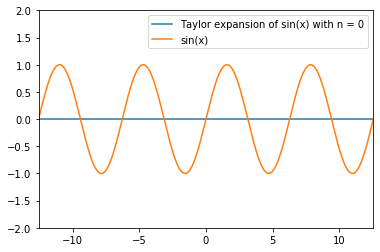

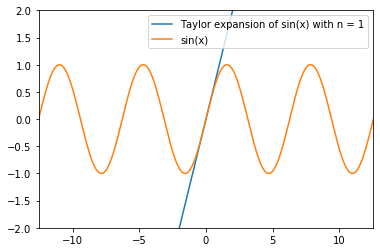

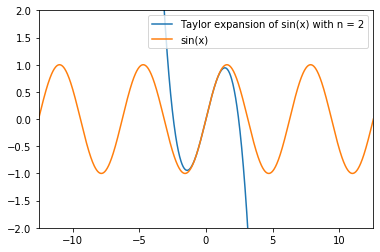

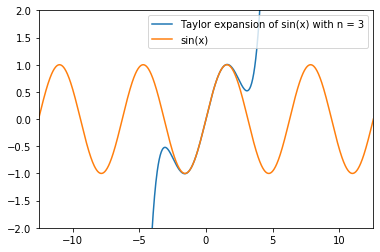

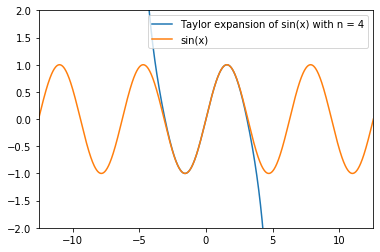

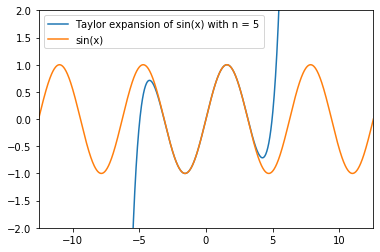

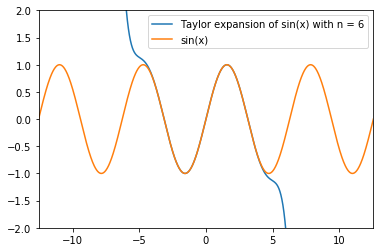

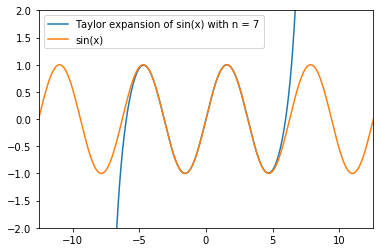

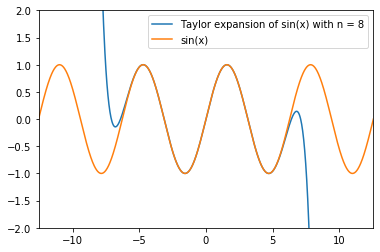

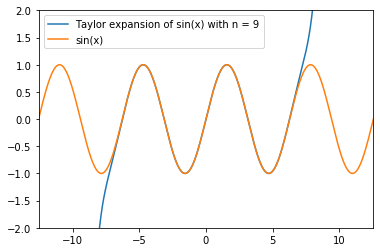

In [30]:
import matplotlib.pyplot as plt
x = np.linspace(-4*np.pi, 4*np.pi, 1000)
for i in range(10):
    plt.plot(x, taylor_sin(x, int(i)), label = "Taylor expansion of sin(x) with n = " +str(i))
    plt.plot(x, np.sin(x), label = "sin(x)")
    plt.legend()
    plt.axis([-4*np.pi, 4*np.pi, -2, 2])
    plt.show()

We can see that the higher the degree of the polynomial, the better the Taylor series approximates the real function.
For purely mathematical functions this is great, but when we model (potentially very) noisy data this can quickly become problematic. This is because we will start to model the noise with high accuracy, and provided this noise is random, this will make a dreadful model when making predictions on new data. This is called over-fitting, and we will demonstrate this later

Now that we know (perhaps) where (2) comes from, we can start to consider the Franke Function. 
<br>
You might already have spotted that using (2) to model (1) might not be as easy as all that. (1) is a function of two variables, and (2) is only for one variable use. 

Luckily, the Taylor series generalizes to (at least) two dimentions, and from that we get

$$
\tilde{y}(x,y)=\beta_0+\beta_1 x+\beta_2 x+\beta_3 xy+\cdots+\beta_{p-n} x^2+\beta_p y^2
$$

We can rewrite this as a linear transformation of a matrix $X$

$$
\tilde{y}=
\begin{bmatrix}
β_0 + β_1 x_0 + β_2 y_0 + β_3 x_0 y_0 + β_4 x_0^2+β_5 y_0^2+\cdots +β_{p-1} x_0^N+β_p y_0^N  \\ 
β_0+β_1 x_1+β_2 y_1+β_3 x_1 y_1+β_4 x_1^2+β_5 y_1^2+\cdots+β_{p-1} x_1^N+β_p y_1^N \\ 
\vdots \\
β_0+β_1 x_n+β_2 y_n+β_3 x_n y_n+β_4 x_n^2+β_5 y_n^2+\cdots +β_{p-1} x_n^N+β_p y_n^N 
\end{bmatrix}
$$

$$
\tilde{y}=
\begin{bmatrix}
1 &  x_0 & y_0& x_0 y_0& x_0^2& y_0^2&\cdots&x_0^N&y_0^N  \\
1&x_1& y_1& x_1 y_1& x_1^2& y_1^2&\cdots& x_1^N& y_1^N \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\ 
1& x_n& y_n& x_n y_n& x_n^2& y_n^2&\cdots & x_n^N& y_n^N 
\end{bmatrix}
\bullet
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_p
\end{bmatrix}
$$


That is:
$$
\tilde{y} = X\beta
$$

Where $X$ is called the design matrix.
Now our aim will be to minimize the difference between $z$ and  $\tilde{y}$. We can define a cost function


\begin{equation}
C(β)=\frac{1}{n} \sum_{i=0}^{n-1}(z_i-\tilde{y}_i )^2 
\tag{4}
\end{equation}

This cost funtion is called the mean squared error (MSE), and will be our measure for the error in our model.

This function outputs the mean square of the difference between our data and our model.
One of our overarching goals will therefore be to minimize this function. In order to do that we observe that
$$
\sum_{i=0}^{n-1}(z_i-\tilde{y}_i )^2   
$$
is the inner product of the real valued vector $[\vec{z}-\tilde{y} ]$, ie

$$
\frac{1}{n} \sum_{i=0}^{n-1}(z_i-\tilde{y}_i )^2 =\frac{1}{n} \langle \vec{z}-\tilde{y}│\vec{z}-\tilde{y} \rangle=\frac{1}{n} (\vec{z}-\tilde{y})^T (\vec{z}-\tilde{y})
$$

Let’s now dispense with vector notation, I've already been exceedingly sloppy in it's use. For simplicity’s sake: lower-case letters are understood to vectors, and upper-case letters are matrices.

So, we can now write (4) as
$$
C(β)=\frac{1}{n} (z-X\beta)^T (z-X\beta)
$$

We will further assume that $C(\beta)$ in convex is the domain of the Franke function. From this we can then infer that

$$
\frac{\partial}{\partial \beta}\frac{1}{n} (z-X\beta)^T (z-X\beta)=0
\leftrightarrow
\frac{\partial}{\partial\beta} (z-X\beta)^T (z-X\beta)=0
$$
will yield the global minimum of the cost function

To solve this equation, we need some matrix calculus. That is a bit beyond the scope of this project. However, the computation is trivial, hence it is left as an exercise for the reader. We find that

$$
-2X^T (z-X\beta)=0
$$
<br>
$$
\beta=(X^T X)^{-1} X^T z
\tag{5}
$$

This solution is what we call ordinary least squares. We can immediately see that we might run into some problems when using this method. 

We could have that $X^T X$ is singular, that is, its determinant is zero, and $X^T X$ has no inverse. If this is the case, we are presented with a few options. In this project we will consider two of them: namely singular value decomposition, resulting in finding the pseudo inverse, and Ridge regression.

Singular value decomposition (SVD) proposes that a singular matrix A can be decomposed into three matrices $U\Sigma V^T$, where $U$ is an $m\times m$ unitary matrix. $\Sigma$ is an $m\times n$ rectangular matrix with the singular values of $A$ as entries along the diagonal. $V$ is an $n\times n$, unitary matrix. 

By performing an SVD we can find the pseudo inverse of $X^T X$, i.e. a matrix $B$ such that $BA≈I$, where $I$ is the identity matrix.

Option two is called Ridge regression. Instead of finding the pseudo inverse of $X^T X$, we add a small number to its diagonal, such that the determinant is not equal to zero:

$$
\beta_{ridge}=(X^T X+\lambda I)^{-1} X^T z
\tag{6}
$$

The parameter $\lambda$ is a number, relatively small compared to the diagonal entries of $X^T X$, and subject to tuning. 

## 2.2

After the regressions have been computed, we will need to evaluate our results, and the quality of the model we produce. This can be done a few different ways, and the first we will consider is the mean squared error (4).

Secondly we will consider the $R^2$-value/ score. It is defined as such

\begin{equation}
R^2=1-\frac{\sum_{i=0}^{n-1}{z_i-\tilde{y}_i }^2 }{\sum_{i=0}^{n-1}(z_i-\bar{z} )^2 }    
\tag{7}
\end{equation}

where
$$\bar{z}=\frac{1}{n} \sum_{i=0}^{n-1}z_i$$

The closer $\frac{\sum_{i=0}^{n-1}{z_i-\tilde{y}_i }^2 }{\sum_{i=0}^{n-1}(z_i-\bar{z} )^2 }$ is to zero, the better the model we have.

Now let us for a moment go back to our cost function (4). We will rewrite it slightly

$$
\frac{1}{n} \sum_{i=0}^{n-1}(z_i-\tilde{y}_i )^2 =\mathbb{E}[(z-\tilde{y})^2 ]
$$

In other words, our cost function is the expectation value of the squared error. Now, let’s assume our dataset is generated by an unknown function $z=f+\epsilon$, where $\epsilon$ is normally distributed noise with mean $\mu=0$ and an unknown variance $\sigma^2$. As we discussed earlier, this can be modelled by $\tilde{y}=X\beta$. We also minimized the cost function in order to find the optimal values for $\beta$. With this in mind, the cost function can be rewritten further:

$$
C(\beta)=\mathbb{E}[(z-f)^2+\mathbb{E}[(f-y ̃ )^2 ]+2\mathbb{E}[(f-y ̃ )(z-f)]]
$$

$$
=\mathbb{E}[(z-f)^2+\mathbb{E}[(f-y ̃ )^2]+2\mathbb{E}[(f-y ̃)(z-f)]]
$$

$$
=\mathbb{E}[(f+\epsilon-f)^2]+\mathbb{E}[(f-y ̃ )^2]+2E[fz-f^2-y ̃z+y ̃f]
$$

$$
=[\epsilon^2]+\mathbb{E}[(f-y ̃ )^2]+2(f^2-f^2-f\mathbb{E}[y ̃]+f\mathbb{E}[y ̃])
$$

$$
=\sigma_{\epsilon}^2+\mathbb{E}[(f-y ̃ )^2]
$$

$$
=\mathbb{E}[(f+\mathbb{E}[y ̃ ]-\mathbb{E}[y ̃ ]-y ̃ )^2 ]+\sigma_{\epsilon}^2
$$

$$
=\mathbb{E}[(f-\mathbb{E}[y ̃ ])^2]+\mathbb{E}[(y ̃-\mathbb{E}[y ̃])]+\sigma_{\epsilon}^2
$$

$$
=\frac{1}{n} \sum_i(f_i-\mathbb{E}[y ̃ ])^2+\frac{1}{n} \sum_i(y_i ̃-\mathbb{E}[\tilde{y}])+\sigma_{\epsilon}^2
\tag{8}
$$

The first term here, $\frac{1}{n} \sum_i(f_i-\mathbb{E}[y ̃ ])^2+\frac{1}{n}$  is called the bias. It tells us how much, by average, the model values are shifted away from the true values. The author believes an analogy will be apt to "illustrate" the point. 
<br>
Imagine you threw a number of darts on a dart board. You have a very tight spread, but always miss the center. So, the darts are clustered around a point a certain distance away from the center. This displacement away from the center is your bias, in this example.


Let’s consider the second term. We can see that this term computes the average squared distance between each point in our model to its mean. This is the variance of our model.

Lastly, $\sigma_\epsilon^2$ is the variance of the noise. As mentioned earlier, this quantity is usually unknown, and we will guesstimate it to be equal to 1.

What we have in (8) is what is know as the bias variance trade-off, and is the scourge of statistics and machine learning. It might not be apparent from (8), but what it tells us is that as the variance decreases, the bias increases. And vice versa. This will be demostrated in this project, using the bootstrapping resampling technique.

## 2.3

When training a model it is important to not use the entire dataset. By that, we mean that a certain amount of the data is reserved for training purposes, and the remaining data serves as test data. It is important to emphasise that what data gets put in the training set, is determined (pseudo) randomly. This is because one assumes that the frequency of the prevalence of a value should be equal in the training set and test set. 

We spilt the dataset into testing and training sets in order to make a model, and test it. It's that simple.
In other words: we use a certain amount of the data to make the model (for example $\tilde{y} = X\beta$). The we test this model on "new" data the model has not yet seen, from the test set. From this test we can evaluate the error the model makes.


When we make/ train our model on the test data, there exists a danger of overfitting the model. This occurs when the model is trained to predict (nearly) all of the values in the training set. These values would include - for example - noise. When this happens, one can achieve an almost (sometimes actually, when working with descition trees. We'll get to this in a later project) $0$ error when training the model. The consequence of this is huge error when we use use the model to predict something from new data.  

In our case we can expect overfitting when our polynomial is of sufficiently high degree.

In this project we will spilt the dataset into $20-80\%$ test and train, respectively.

## 2.4

When doing these kinds of data analysis one might want to employ resampling techniques/ methods. These are methods for estemating for example sample variance, bias, or they can be used as model selection tools.


We will here concider, in particular, two such techniques, namely bootstrapping and cross-validation.

Bootstrapping is a method where one draws random samples from the training data, and makes a model on this data. The samples are drawn with replacement, meaning the same sample can be drawn multiple times. 
<br>
This is done a certain number $b$ times, and when this is done one can averages all the models created, and (for example) estimate bias and variance. 

In cross-validation, instead of the train-test split approach, we divide our dataset into k (roughly) equally sized folds (or sets). Then we choose one of the folds to be our test data. The remaining folds becomes our training data. 
Then we train and test, using a (for example) regression algorithm.
Then we pick a new fold, that has not already been picked, and repeat the process. 
This is done k times, and finally we average the results.
<br>
This way we use all the data for both testing (exactly once) and training.


We will compare the bias and variance of these two methods, used on our dataset.

## 3.1
First, we need some imports

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from numba import jit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import numpy as np

Now, let's define the Franke function

In [7]:
class Franke:
    def __init__(self, x, y, n, noise):
        self.x = x
        self.y = y
        self.n = n
        
        self.noise = noise
        
    def func_eval(self, x, y):
        ledd1 = 3/4.0*np.exp(-(9*x-2)**2/4-(9*y-2)**2/4)
        ledd2 = 3/4.0*np.exp(-(9*x+1)**2/49-(9*y+1)/10)
        ledd3 = 1/2.0*np.exp(-(9*x-7)**2/4-(9*y-3)**2/4)
        ledd4 = -1/5.0*np.exp(-(9*x-4)**2-(9*y-7)**2)
        if self.noise == True:
            return ledd1+ledd2+ledd3+ledd4 + 0.01*np.random.normal(0,1,self.n)
        else:
            return ledd1+ledd2+ledd3+ledd4
        
    def plot(self):
        
        X, Y = np.meshgrid(np.sort(self.x), np.sort(self.y))
        z = Franke.func_eval(self, X, Y)
        #Plotting the Frake function
        fig1 = plt.figure(figsize=(10,10))
        ax = plt.axes(projection='3d')
        ax.plot_surface(X, Y, z)
        plt.xlabel("x")
        plt.ylabel("y")
        if self.noise == True:
            plt.title("Franke Function with noise = 0.01*N(0, 1)")
        else:
            plt.title("Franke Function without noise")
        plt.show()
    
    


In [8]:
n = 300 #number of datapoints
np.random.seed(666)

x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)

We can now plot the function both with and without noise:

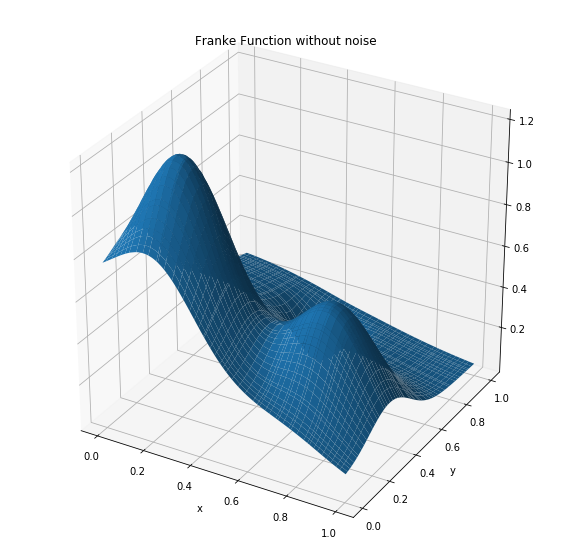

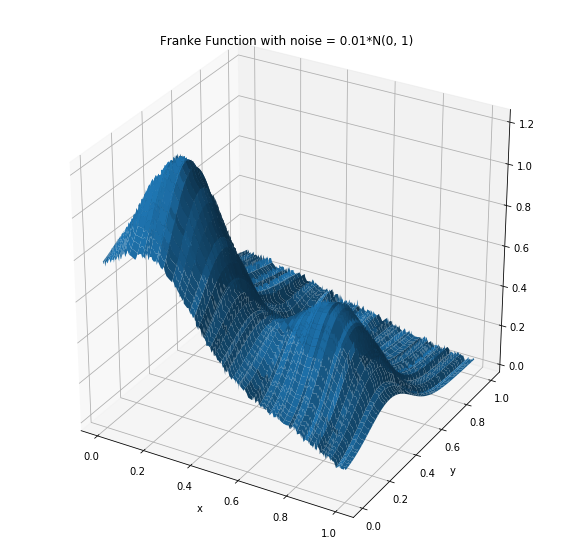

In [11]:
franke_no_noise = Franke(x, y, n, noise = False)
franke_no_noise.plot()

franke_noise = Franke(x, y, n, noise = True)
franke_noise.plot()


Now we need to set up our design matrix. When doing this, we will use the @jit decorator so that the code will run faster.

In [12]:
@jit(nopython=True)
def X_d(degree, x, y):
    if len(x.shape) > 1:
            x = np.ravel(x)
            y = np.ravel(y)
    N = len(x)
    l = int((degree+1)*(degree+2)/2)          # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,degree+1):
            q = int((i)*(i+1)/2)
            for k in range(i+1):
                    X[:,q+k] = (x**(i-k))*(y**k)
    return X

the we can define the MSE, R2, bias, and variance:

In [13]:
def MSE(z, y_tilde):
    return np.mean((z-y_tilde)**2)

def R2(z, y_tilde):
    z_mean = 1/len(z)*np.sum(z)
    return 1-np.sum((z-y_tilde)**2)/np.sum((z-z_mean)**2)

def bias(f, y_tilde):
    E_y_tilde = np.mean(y_tilde)
    return np.mean((f-E_y_tilde)**2)

def variance(f):
    E_f = np.mean(f)
    return np.mean((f-E_f)**2)

We will let $z$ be the Franke function with noise.

In [14]:
z = franke_noise.func_eval(x, y)

Now we can set up the OLS method, specializing it for the task at hand (estimating error as a function of polynomial degree). For more general usage, one can use the regression methods from Sci-Kit learn. We let our method fit a 100 different models, and then average them. This aggregation can help with overfitting, and also in lowering the variance. We can then look at the MSE of these averaged models, for degree $d\in[1, 15]$

In [15]:

def OLS(X_design, x, y, z, degree, return_beta, scale):
        ztrain, ztest = train_test_split(z, test_size = 0.2)
        n_tests = 100
        pred = 0
        train = 0
        mse_pred = 0
        mse_train = 0
        for i in range(n_tests):
            X = X_design(degree, x, y)
            Xtrain, Xtest, ztrain, ztest = train_test_split(X, z, test_size = 0.2)
            
            if scale == True:
                scaler = StandardScaler()
                Xtrain = scaler.fit(Xtrain).transform(Xtrain)
                Xtest = scaler.transform(Xtest)
            else:
                Xtrain = Xtrain
                Xtest = Xtest
                
            olsbeta = np.linalg.pinv(Xtrain.T @ Xtrain) @ Xtrain.T @ ztrain
            pred += Xtest @ olsbeta
            train += Xtrain @ olsbeta
            
            mse_pred += MSE(ztest, Xtest @ olsbeta)
            mse_train += MSE(ztrain, Xtrain @ olsbeta)
        pred /= n_tests
        train /= n_tests
        mse_pred /= n_tests
        mse_train /= n_tests
        if return_beta == True:
            return pred, train
        elif return_beta == False:
            return mse_pred, mse_train 



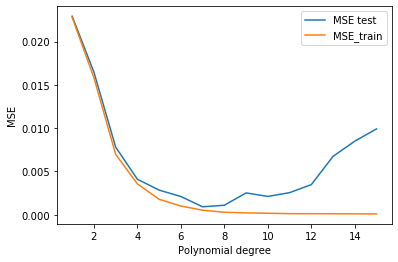

In [16]:
degrees_OLS = np.linspace(1, 15, 15)
mse_test = np.zeros(len(degrees_OLS))
mse_train = mse_test.copy()

for i in range(len(degrees_OLS)):
    mse_test[i], mse_train[i] = OLS(X_d, x, y, z, i+1, return_beta = False, scale = False)

plt.plot(degrees_OLS, mse_test, label = "MSE test")
plt.plot(degrees_OLS, mse_train, label = "MSE_train")
plt.legend()
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.show()

We can now do the same, but for the case of Ridge regression:

In [17]:
def Ridge(X_design, x, y, z, degree, return_beta, lam, scale):
        ztrain, ztest = train_test_split(z, test_size = 0.2)
        n_tests = 100
        pred = 0
        train = 0
        mse_pred = 0
        mse_train = 0
        for i in range(n_tests):
            X = X_design(degree, x, y)
            Xtrain, Xtest, ztrain, ztest = train_test_split(X, z, test_size = 0.2)
            
            if scale == True:
                scaler = StandardScaler()
                Xtrain = scaler.fit(Xtrain).transform(Xtrain)
                Xtest = scaler.transform(Xtest)
            else:
                Xtrain = Xtrain
                Xtest = Xtest
                
            
            olsbeta = np.linalg.pinv(Xtrain.T @ Xtrain+lam*np.identity(len(Xtrain.T))) @ Xtrain.T @ ztrain
            pred += Xtest @ olsbeta
            train += Xtrain @ olsbeta
            
            mse_pred += MSE(ztest, Xtest @ olsbeta)
            mse_train += MSE(ztrain, Xtrain @ olsbeta)
        pred /= n_tests
        train /= n_tests
        mse_pred /= n_tests
        mse_train /= n_tests
        if return_beta == True:
            return pred, train
        elif return_beta == False:
            return mse_pred, mse_train 

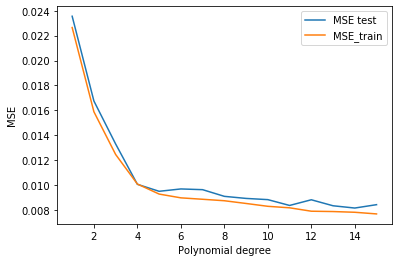

In [18]:
mse_test = np.zeros(len(degrees_OLS))
mse_train = mse_test.copy()

for i in range(len(degrees_OLS)):
    mse_test[i], mse_train[i] = Ridge(X_d, x, y, z, i+1, return_beta = False, lam = 0.1, scale = False)

plt.plot(degrees_OLS, mse_test, label = "MSE test")
plt.plot(degrees_OLS, mse_train, label = "MSE_train")
plt.legend()
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.show()

The parameter $\lambda$ is obviously possible to tune, and we'll possibly get back to that, but we immediatly observe that for $\lambda=0.1$ there is no significant overfitting. This might be due to the somewhat higher $MSE$ we get from adding $\lambda$, instead of finding the (pseudo) inverse of $X^TX$

We see that for higher degrees of complexity, the ridge regression shows a lower $MSE$ that OLS. For lower degrees of complexity, OLS performes somewhat better. Between this model we can sense a tradeoff: if we need the lowest possible error in our model, perhaps Ridge regression is more suitable than OLS. But if computational speed is of importance (imagine our generated dataset was much bigger), OLS might be a better option. 

Now, we can define a function for bootstrapping, and aggregating:

In [21]:
def bootstrap(model, degree, n_b_samples):
    from sklearn.utils import resample
    #Number of bootstrap samples
    boots = n_b_samples
    
    
    x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x, y, z, test_size=0.2, shuffle=True)

    #Arrays for storing boostrap-samples
    z_test1 = np.zeros((int(0.2*n),boots))
    z_train1 = np.zeros((int(0.8*n),boots))

    #Arrays for storing all bootstrap-models
    z_pred = np.zeros((len(z_test),boots))
    z_pred_train = np.zeros((len(z_train),boots))
    for i in range(boots):
        x_rs, y_rs, z_rs = resample(x_train, y_train, z_train)
        z_train1[:,i] = z_rs
        z_test1[:,i]=z_test
        X_train = X_d(degree, x_rs,y_rs)
        X_test= X_d(degree ,x_test, y_test)

        z_pred[:, i] = model.fit(X_train, z_rs).predict(X_test).ravel()
        z_pred_train[:, i] = model.fit(X_train, z_rs).predict(X_train).ravel()
    
    
    bias = np.mean( (z_test1 - np.mean(z_pred, axis=1, keepdims=True))**2 )
    var = np.mean( np.var(z_pred, axis=1, keepdims=True))
    return bias, var

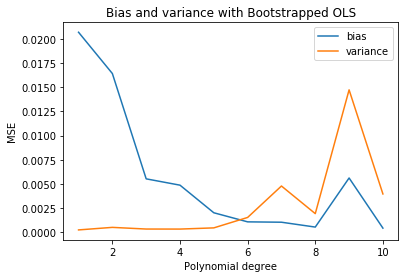

In [24]:
from sklearn.linear_model import LinearRegression
degrees = np.linspace(1, 10, 10)
bias = np.zeros(len(degrees))
var = bias.copy()
regressor = LinearRegression()
for i in range(len(degrees)):
    i = int(i)
    bias[i], var[i] = bootstrap(regressor, i+1, 100)

plt.plot(degrees, bias, label = "bias")
plt.plot(degrees, var, label = "variance")
plt.legend()
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.title("Bias and variance with Bootstrapped OLS")
plt.show()

Here we can see the bias variance trade-off in action. As the bias decreases, the variance increases.

We can do the same thing with cross validation:

In [25]:
def CV(k, degree, model):
    from sklearn.utils import shuffle
    x_s, y_s, z_s = shuffle(x, y, z)
    #making sure z_train1 and z_val have the same dimentions
    if n % k == 0:
        z_train1 = np.zeros((int(n-n/k),k))
    else:
        z_train1 = np.zeros((int(n-n/k)+1,k))

    z_test1 = np.zeros((int(n/k),k))

    z_pred_train = z_train1.copy()
    z_pred = z_test1.copy()
    w = int(n/k)

    for i in range(k):
        xx = x_s
        yy = y_s
        zz = z_s
        x_val = xx[w*i: w*(i+1)]
        x_train = np.delete(xx, np.s_[w*i: w*(i+1)])

        y_val = yy[w*i: w*(i+1)]
        y_train = np.delete(yy, np.s_[w*i: w*(i+1)])

        z_val = zz[w*i: w*(i+1)]
        z_train = np.delete(zz, np.s_[w*i: w*(i+1)])

        z_train1[:, i] = z_train
        z_test1[:,i] = z_val

        X_train = X_d(degree, x_train ,y_train)
        X_test= X_d(degree ,x_val, y_val)



        beta_model = model.fit(X_train, z_train)

        z_pred[:, i] = beta_model.predict(X_test).ravel()
        z_pred_train[:, i] = beta_model.predict(X_train).ravel()
    bias_ = np.mean( (z_test1 - np.mean(z_pred, axis=1, keepdims=True))**2 )
    variance_ = np.mean( np.var(z_pred, axis=1, keepdims=True))

    return bias_, variance_, bias_+variance_

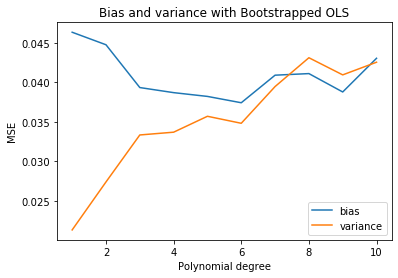

In [27]:

degrees = np.linspace(1, 10, 10)
bias = np.zeros(len(degrees))
var = bias.copy()
abk = var.copy()
regressor2 = LinearRegression()
for i in range(len(degrees)):
    i = int(i)
    bias[i], var[i], abk[i] = CV(2, i+1, regressor2)

plt.plot(degrees, bias, label = "bias")
plt.plot(degrees, var, label = "variance")
plt.legend()
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.title("Bias and variance with Bootstrapped OLS")
plt.show()

We obsverve some of the same behaviour as with the bootstrapping